上一节的ResNet通过前层与后层的“短路连接”（Shortcuts），加强了前后层之间的信息流通，在一定程度上缓解了梯度消失现象，从而可以将神经网络搭建得很深。更进一步，本节的主角DenseNet最大化了这种前后层信息交流，通过建立前面所有层与后面层的密集连接，实现了特征在通道维度上的复用，使其可以在参数与计算量更少的情况下实现比ResNet更优的性能。

DenseNet的网络架构如图所示，**网络由多个Dense Block与中间的卷积池化组成，核心就在Dense Block中**。Dense Block中的黑点代表一个卷积层，其中的多条黑线代表数据的流动，每一层的输入由前面的所有卷积层的输出组成。注意这里使用了通道拼接（Concatnate）操作，而非ResNet的逐元素相加操作。

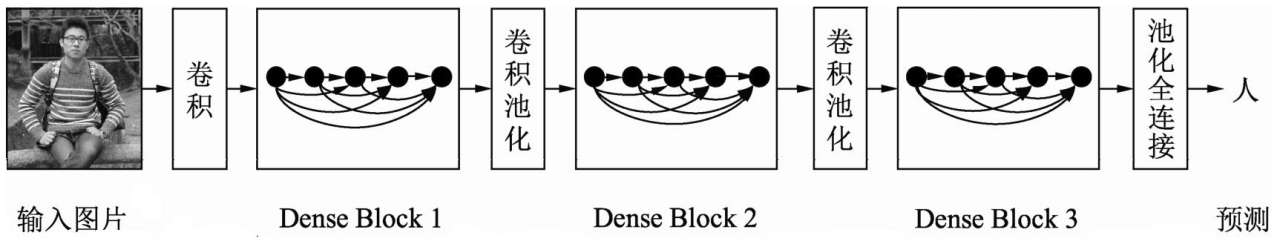

### DenseNet的结构有如下两个特性
①神经网络一般需要使用池化等操作缩小特征图尺寸来提取语义特征，而Dense Block需要保持每一个Block内的特征图尺寸一致来直接进行Concatnate操作，因此DenseNet被分成了多个Block。Block的数量一般为4。

②两个相邻的Dense Block之间的部分被称为Transition层，具体包括BN、ReLU、1×1卷积、2×2平均池化操作。1×1卷积的作用是降维，起到压缩模型的作用，而平均池化则是降低特征图的尺寸。

具体的Block实现细节如下图所示，每一个Block由若干个Bottleneck的卷积层组成，对应上图中的黑点。Bottleneck由BN、ReLU、1×1卷积、BN、ReLU、3×3卷积的顺序构成。

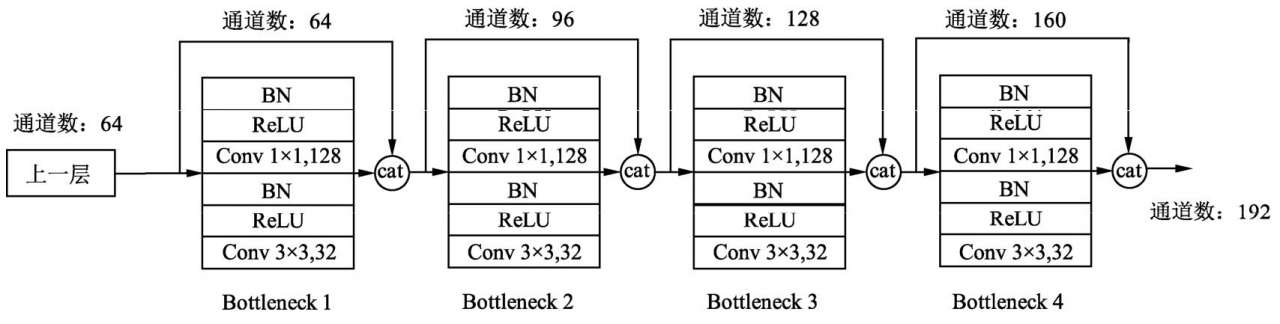

### 关于Block，有以下4个细节需要注意
①每一个Bottleneck输出的特征通道数是相同的，例如这里的32。同时可以看到，经过Concatnate操作后的通道数是按32的增长量增加的，因此这个32也被称为GrowthRate。

②这里1×1卷积的作用是固定输出通道数，达到降维的作用。当几十个Bottleneck相连接时，Concatnate后的通道数会增加到上千，如果不增加1×1的卷积来降维，后续3×3卷积所需的参数量会急剧增加。1×1卷积的通道数通常是GrowthRate的4倍。

③图3.20中的特征传递方式是直接将前面所有层的特征Concatnate后传到下一层，这种方式与具体代码实现的方式是一致的，而不像图3.19中，前面层都要有一个箭头指向后面的所有层。

④Block采用了激活函数在前、卷积层在后的顺序，这与一般的网络上是不同的。

### DenseNet网络的优势主要体现在以下两个方面
①密集连接的特殊网络，使得每一层都会接受其后所有层的梯度，而不是像普通卷积链式的反传，因此一定程度上解决了梯度消失的问题。

②通过Concatnate操作使得大量的特征被复用，每个层独有的特征图的通道是较少的，因此相比ResNet, DenseNet参数更少且计算更高效。

### DenseNet的不足
①由于需要进行多次Concatnate操作，数据需要被复制多次，显存容易增加得很快，需要一定的显存优化技术。

②另外，DenseNet是一种更为特殊的网络，ResNet则相对一般化一些，因此ResNet的应用范围更广泛。